In [265]:
!pip install wordcloud
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from scipy import stats

In [638]:
data=pd.read_csv("ds_salaries.csv")

In [639]:
print(data.shape)

(3755, 11)


In [640]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [641]:
data.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [642]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [643]:
data.duplicated().sum()

1171

In [644]:
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [645]:
numerical_columns=data.select_dtypes(include=['int64']).columns
categorical_columns=data.select_dtypes(include=['object']).columns

In [646]:
numerical_columns

Index(['work_year', 'salary', 'salary_in_usd', 'remote_ratio'], dtype='object')

In [647]:
categorical_columns

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

In [648]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [649]:
unique_work_year = data['work_year'].unique()
unique_employee_residence = data['employee_residence'].unique()

print("Unique values in work_year:", unique_work_year)
print("Unique values in employee_residence:", unique_employee_residence)

Unique values in work_year: [2023 2022 2020 2021]
Unique values in employee_residence: ['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'PT' 'NL' 'CH' 'CF' 'FR' 'AU'
 'FI' 'UA' 'IE' 'IL' 'GH' 'AT' 'CO' 'SG' 'SE' 'SI' 'MX' 'UZ' 'BR' 'TH'
 'HR' 'PL' 'KW' 'VN' 'CY' 'AR' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK'
 'IT' 'MA' 'LT' 'BE' 'AS' 'IR' 'HU' 'SK' 'CN' 'CZ' 'CR' 'TR' 'CL' 'PR'
 'DK' 'BO' 'PH' 'DO' 'EG' 'ID' 'AE' 'MY' 'JP' 'EE' 'HN' 'TN' 'RU' 'DZ'
 'IQ' 'BG' 'JE' 'RS' 'NZ' 'MD' 'LU' 'MT']


In [650]:
iso_forest=IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(data[numerical_columns])
outlier_count = (outliers == -1).sum()
total_count = len(outliers)
outlier_percentage = (outlier_count / total_count) * 100
print(f"Percentage of numerical outliers: {outlier_percentage:.2f}%")

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Percentage of numerical outliers: 5.01%


In [651]:
cat_outliers = {}
cat_outlier_count = 0

for col in categorical_columns:
    value_counts = data[col].value_counts()
    rare_categories = value_counts[value_counts < 0.05 * len(data)]
    cat_outliers[col] = rare_categories.index.tolist()
    cat_outlier_count += data[col].isin(rare_categories.index).sum()

total_count = len(data)

categorical_outlier_percentage = (cat_outlier_count / total_count) * 100

print(f"Categorical outliers count: {cat_outlier_count}")
print(f"Categorical outliers percentage: {categorical_outlier_percentage:.2f}%")

Categorical outliers count: 3034
Categorical outliers percentage: 80.80%


In [652]:
def assign_broader_category(job_title):
    data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"]
    data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"]
    machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
    data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
    management = ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]
    
    if job_title in data_engineering:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    elif job_title in data_architecture:
        return "Data Architecture"
    elif job_title in management:
        return "Management"
    else:
        return "Other"

data['job_category'] = data['job_title'].apply(assign_broader_category)


In [653]:
def ratio_class(ratio):
    if ratio == 100:
        return 'Remote'
    elif ratio == 0:
        return 'In-Person'
    else:
        return 'Hybrid'

In [654]:
data['ratio_class'] = data['remote_ratio'].apply(ratio_class)
data['ratio_class'].value_counts()

In-Person    1923
Remote       1643
Hybrid        189
Name: ratio_class, dtype: int64

In [655]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category,ratio_class
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,Other,Remote
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,Machine Learning,Remote
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,Machine Learning,Remote
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,Data Science,Remote
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,Data Science,Remote


In [656]:
# Experience level
data['experience_level'] = data['experience_level'].replace(
    {'EN': 'Entry-Level',
     'MI': 'Mid-Level',
     'SE': 'Senior',
     'EX': 'Executive'} 
)

# Company Size
data['company_size'] = data['company_size'].replace(
    {'S': 'Small',
     'M': 'Medium',
     'L': 'Large'}
)

In [657]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category,ratio_class
0,2023,Senior,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,Large,Other,Remote
1,2023,Mid-Level,CT,ML Engineer,30000,USD,30000,US,100,US,Small,Machine Learning,Remote
2,2023,Mid-Level,CT,ML Engineer,25500,USD,25500,US,100,US,Small,Machine Learning,Remote
3,2023,Senior,FT,Data Scientist,175000,USD,175000,CA,100,CA,Medium,Data Science,Remote
4,2023,Senior,FT,Data Scientist,120000,USD,120000,CA,100,CA,Medium,Data Science,Remote


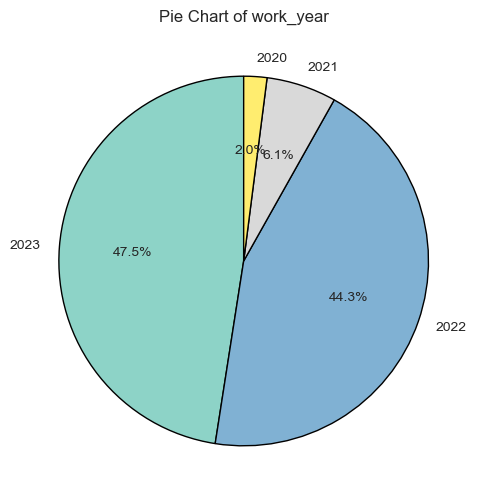

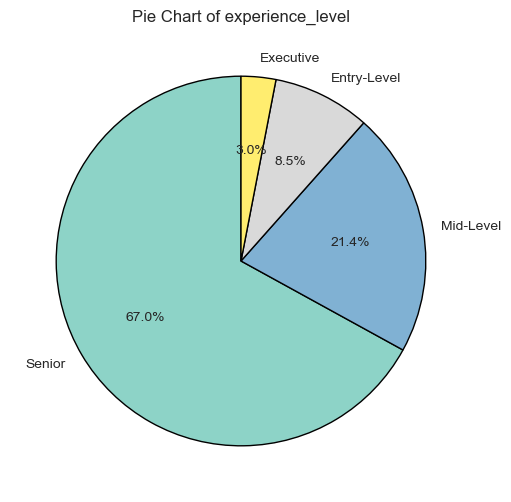

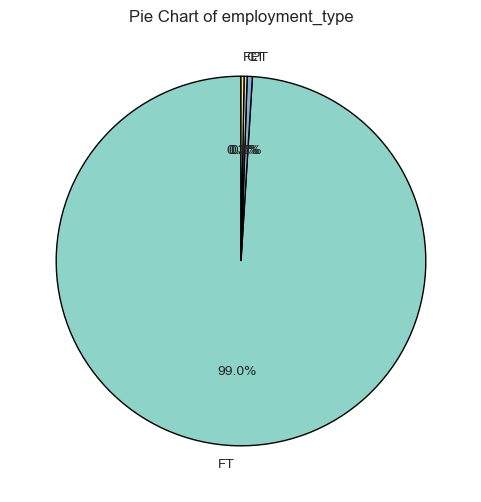

KeyError: 'remote_class'

<Figure size 600x600 with 0 Axes>

In [658]:
for col in ['work_year','experience_level','employment_type','remote_class','company_size']:
    plt.figure(figsize=(6, 6))
    data[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3', wedgeprops={'edgecolor': 'black'})
    plt.title(f"Pie Chart of {col}")
    plt.ylabel('')  # Remove the y-label for clarity
    plt.show()

In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(data[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [ ]:
value_counts = data['job_category'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(12, 6))
top_n = min(17, len(value_counts))
ax.barh(value_counts.index[:top_n], value_counts.values[:top_n])
ax.set_xlabel('Percentage')
ax.set_ylabel('Job Category')
ax.set_title('Job Titles Percentage')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['salary_in_usd'])
plt.title('Salary Distribution')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='employment_type', y='salary_in_usd')
plt.title('Salary Distribution Across Different Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.show()

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

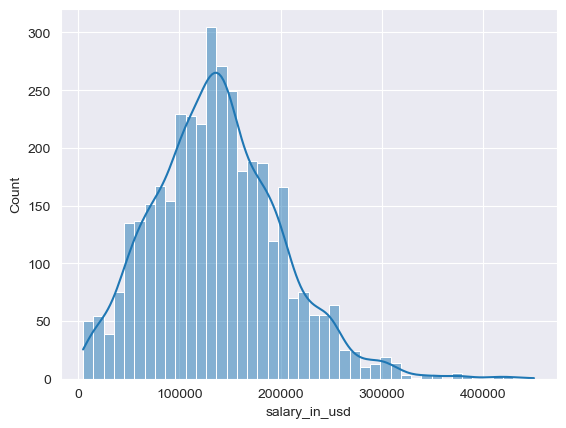

In [659]:
sns.histplot(data['salary_in_usd'], kde=True)

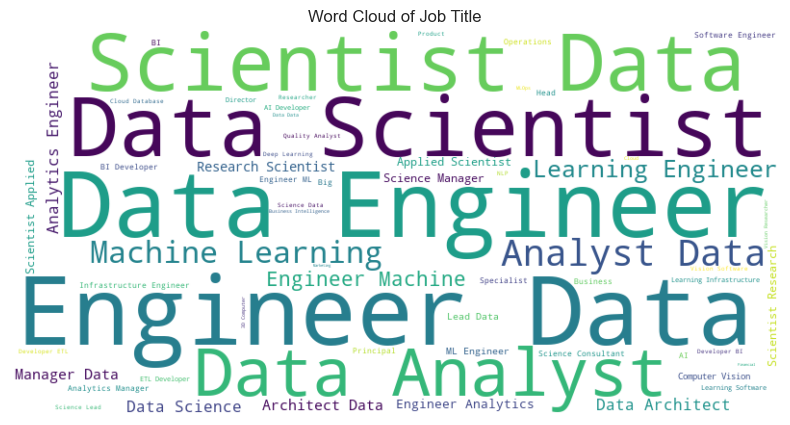

In [660]:
text_data = ' '.join(data['job_title'].dropna())  
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200).generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Word Cloud of Job Title')
plt.show()

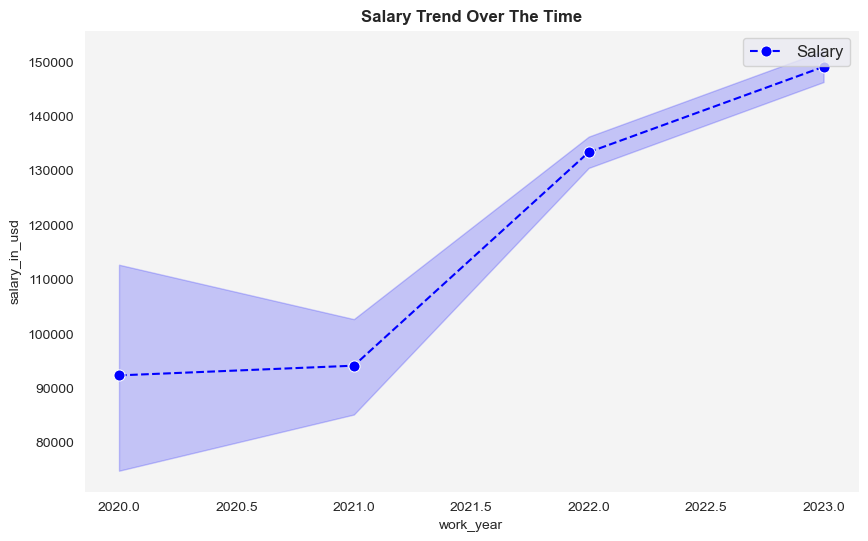

In [661]:
plt.figure(figsize = (10,6))
salary_trend = data[['salary_in_usd', 'work_year']].sort_values(by = 'work_year')
p = sns.lineplot(data =salary_trend ,x = 'work_year', y = 'salary_in_usd', marker = 'o',linestyle='--', color='Blue', markersize=8 )
plt.title('Salary Trend Over The Time', fontsize=12, fontweight='bold')

p.set_facecolor("#f4f4f4")
plt.legend(['Salary'], loc='best', fontsize=12)

p.grid(False)
plt.show()

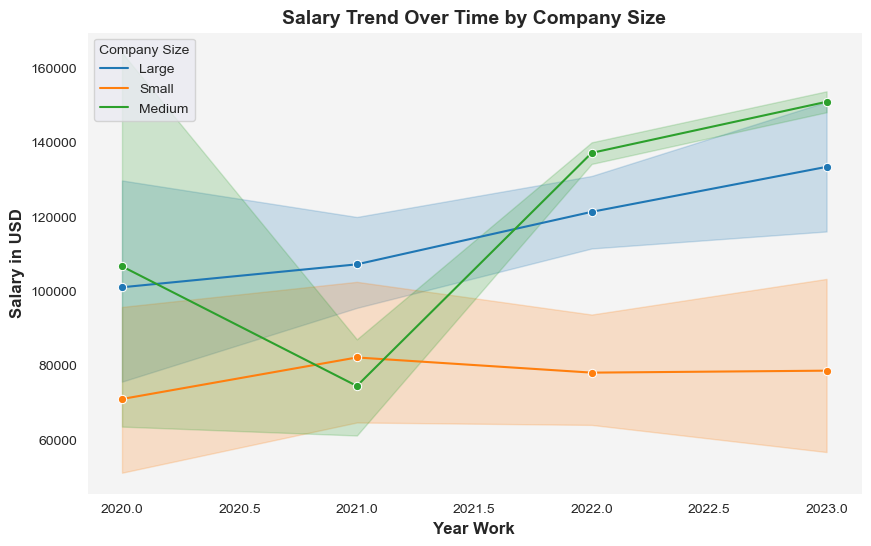

In [662]:
plt.figure(figsize=(10, 6))
p = sns.lineplot(data=data, x='work_year', y='salary_in_usd', hue='company_size', marker='o')

plt.xlabel('Year Work', fontsize=12, fontweight='bold')
plt.ylabel('Salary in USD', fontsize=12, fontweight='bold')

plt.legend(title='Company Size', title_fontsize=10, fontsize=10, loc='upper left')
plt.title('Salary Trend Over Time by Company Size', fontsize=14, fontweight='bold')

p.set_facecolor("#f4f4f4")

p.grid(False)
plt.show()

In [663]:
emp_salary = data.groupby('employment_type')['salary_in_usd'].mean()
emp_salary

employment_type
CT    113446.900000
FL     51807.800000
FT    138314.199570
PT     39533.705882
Name: salary_in_usd, dtype: float64

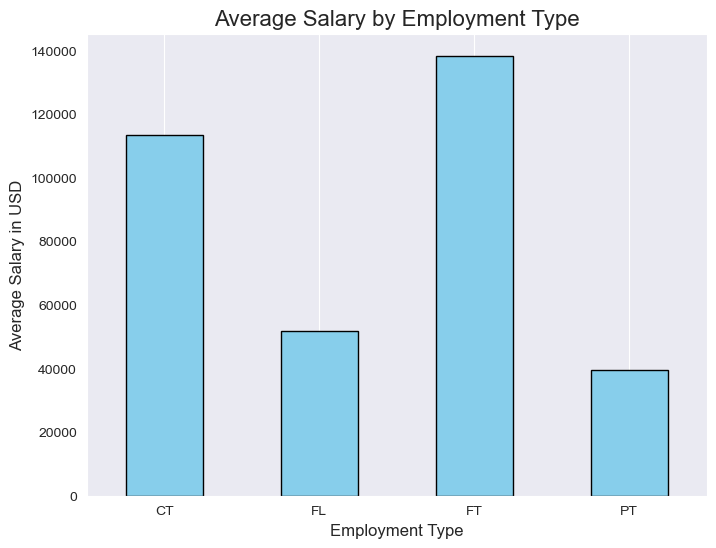

In [664]:
plt.figure(figsize=(8, 6))
emp_salary.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Salary by Employment Type', fontsize=16)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Average Salary in USD', fontsize=12)

plt.xticks(rotation=0)  
plt.grid(axis='y')  
plt.show()

In [665]:
emp_salary1 = data.groupby('salary_currency')['salary_in_usd'].mean()
emp_salary1

salary_currency
AUD     74198.444444
BRL     12448.000000
CAD     96707.400000
CHF    100682.000000
CLP     40038.000000
CZK      5132.000000
DKK     31192.666667
EUR     62281.733051
GBP     83850.229814
HKD     65062.000000
HUF     29892.666667
ILS    423834.000000
INR     25785.300000
JPY     60921.333333
MXN     33511.000000
PLN     34165.200000
SGD     81770.000000
THB     27096.500000
TRY     20096.666667
USD    149366.906638
Name: salary_in_usd, dtype: float64

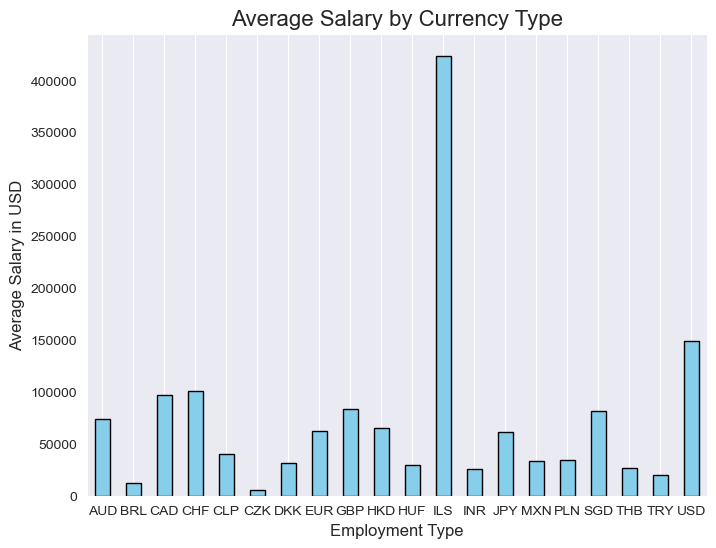

In [666]:
plt.figure(figsize=(8, 6))
emp_salary1.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Salary by Currency Type', fontsize=16)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Average Salary in USD', fontsize=12)

plt.xticks(rotation=0)  
plt.grid(axis='y')  
plt.show()

In [667]:
emp_salary2 = data.groupby('experience_level')['salary_in_usd'].mean()
emp_salary2

experience_level
Entry-Level     78546.284375
Executive      194930.929825
Mid-Level      104525.939130
Senior         153051.071542
Name: salary_in_usd, dtype: float64

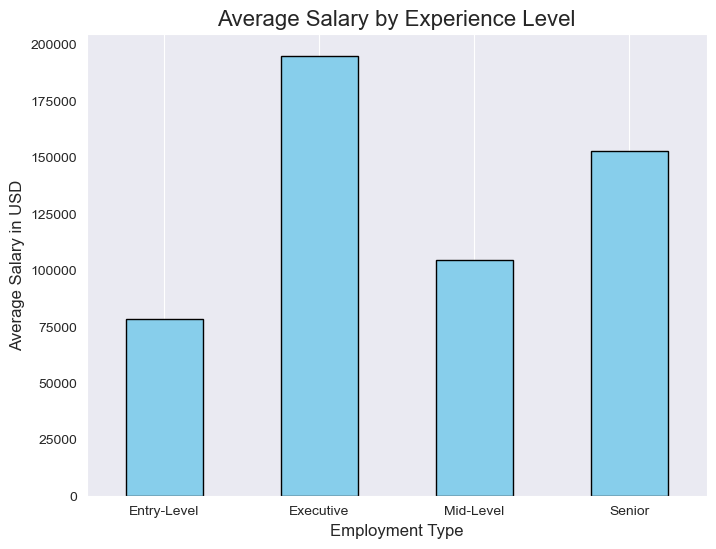

In [668]:
plt.figure(figsize=(8, 6))
emp_salary2.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Salary by Experience Level', fontsize=16)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Average Salary in USD', fontsize=12)

plt.xticks(rotation=0)  
plt.grid(axis='y')  
plt.show()

In [669]:
emp_salary3 = data.groupby('ratio_class')['salary_in_usd'].mean()
emp_salary3

ratio_class
Hybrid        78400.687831
In-Person    144316.202288
Remote       136481.452830
Name: salary_in_usd, dtype: float64

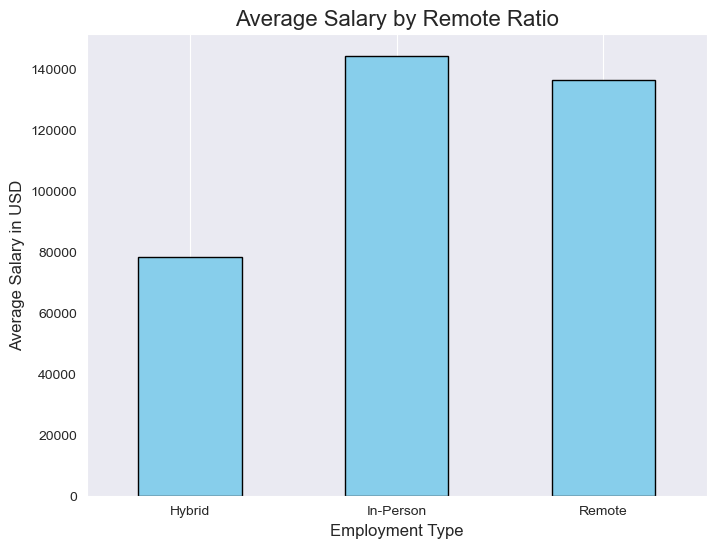

In [670]:
plt.figure(figsize=(8, 6))
emp_salary3.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Salary by Remote Ratio', fontsize=16)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Average Salary in USD', fontsize=12)

plt.xticks(rotation=0)  
plt.grid(axis='y')  
plt.show()

In [671]:
emp_salary4 = data.groupby('company_size')['salary_in_usd'].mean()
emp_salary4

company_size
Large     118300.982379
Medium    143130.548367
Small      78226.682432
Name: salary_in_usd, dtype: float64

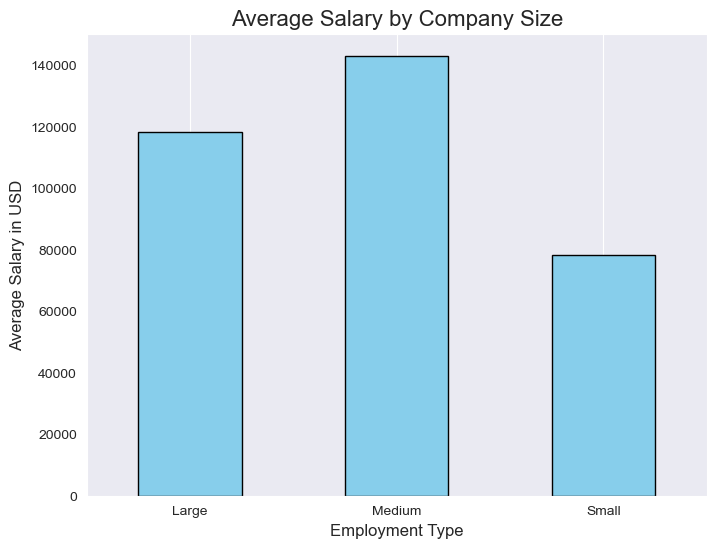

In [672]:
plt.figure(figsize=(8, 6))
emp_salary4.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Salary by Company Size', fontsize=16)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Average Salary in USD', fontsize=12)

plt.xticks(rotation=0)  
plt.grid(axis='y')  
plt.show()

In [673]:
emp_salary5 = data.groupby('company_location')['salary_in_usd'].mean()
emp_salary5

company_location
AE    100000.000000
AL     10000.000000
AM     50000.000000
AR     25000.000000
AS     29351.000000
          ...      
TH     23064.333333
TR     19058.000000
UA     57850.000000
US    151822.009539
VN     12000.000000
Name: salary_in_usd, Length: 72, dtype: float64

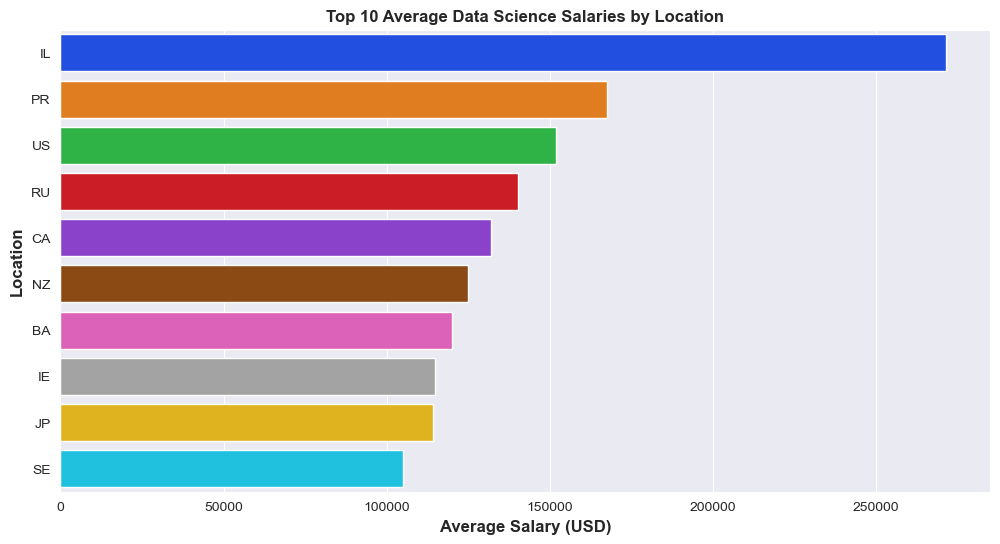

In [674]:
emp_salary5 = emp_salary5.sort_values(ascending=False)

emp_salary5_df = emp_salary5.reset_index()

top_n_locations = 10

plt.figure(figsize=(12, 6))
sns.barplot(x='salary_in_usd', y='company_location', data=emp_salary5_df.head(top_n_locations), palette='bright')

plt.title(f'Top {top_n_locations} Average Data Science Salaries by Location', fontsize=12, fontweight='bold')
plt.xlabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Location', fontsize=12, fontweight='bold')

plt.show()


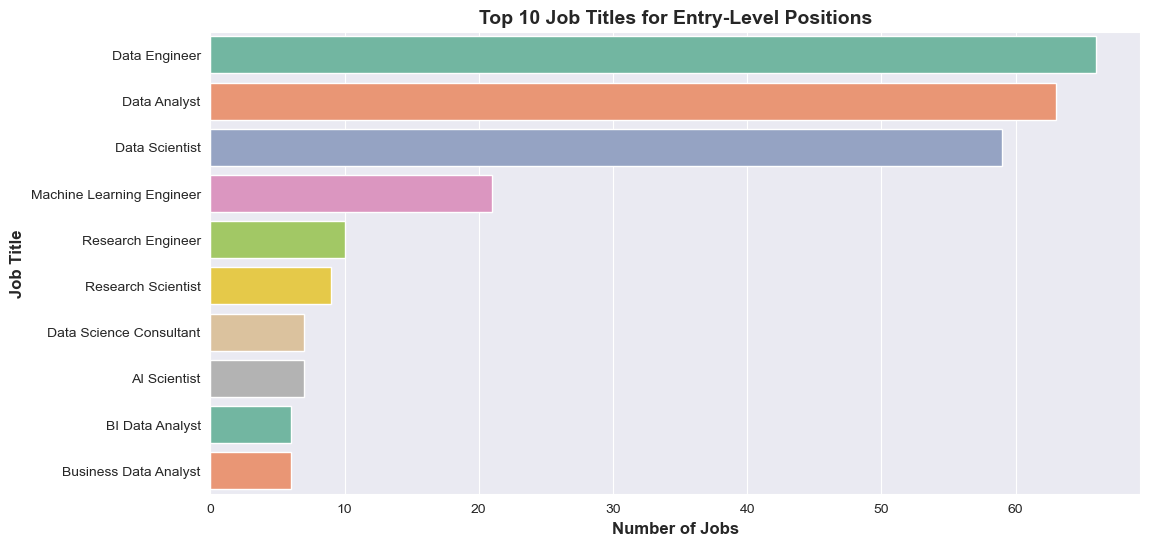

In [675]:
entry_level_jobs = data[data['experience_level'] == 'Entry-Level']

job_title_counts = entry_level_jobs['job_title'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=job_title_counts.values, y=job_title_counts.index, palette='Set2')

plt.title('Top 10 Job Titles for Entry-Level Positions', fontsize=14, fontweight='bold')
plt.xlabel('Number of Jobs', fontsize=12, fontweight='bold')
plt.ylabel('Job Title', fontsize=12, fontweight='bold')

plt.show()

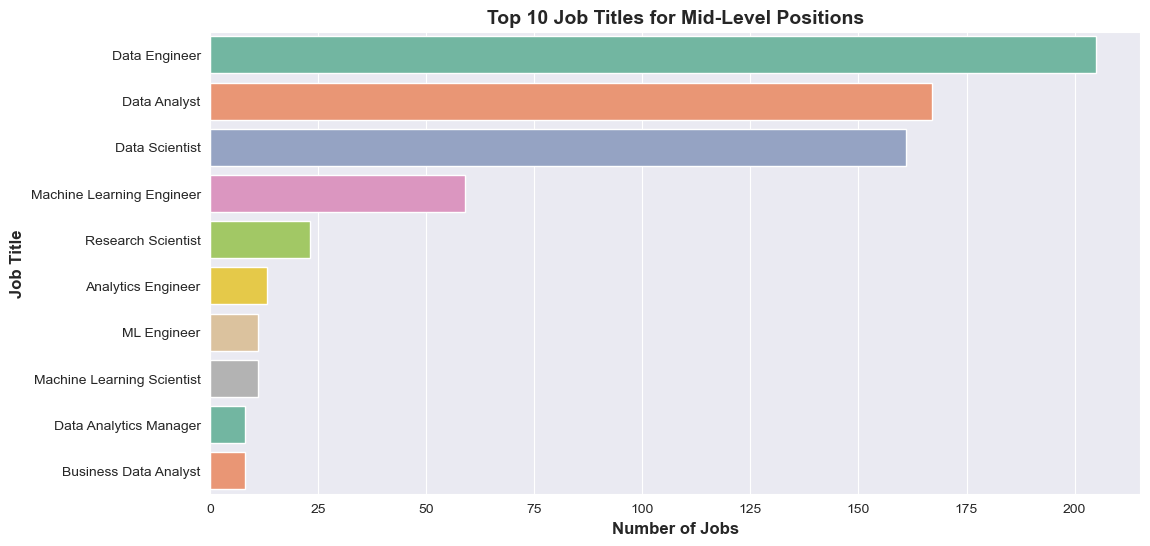

In [676]:
entry_level_jobs = data[data['experience_level'] == 'Mid-Level']

job_title_counts = entry_level_jobs['job_title'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=job_title_counts.values, y=job_title_counts.index, palette='Set2')

plt.title('Top 10 Job Titles for Mid-Level Positions', fontsize=14, fontweight='bold')
plt.xlabel('Number of Jobs', fontsize=12, fontweight='bold')
plt.ylabel('Job Title', fontsize=12, fontweight='bold')

plt.show()

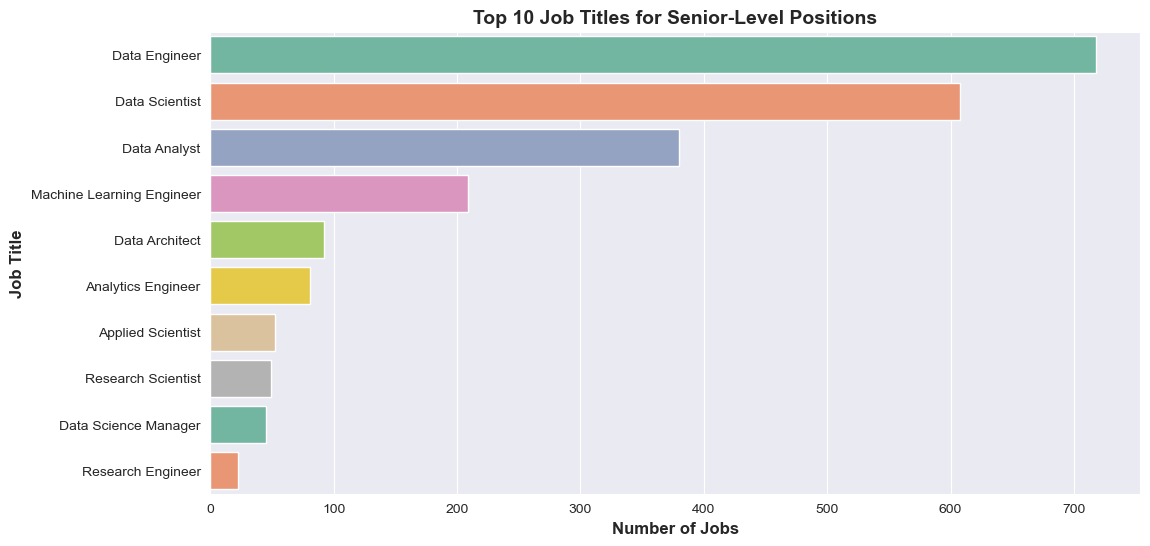

In [677]:
entry_level_jobs = data[data['experience_level'] == 'Senior']

job_title_counts = entry_level_jobs['job_title'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=job_title_counts.values, y=job_title_counts.index, palette='Set2')

plt.title('Top 10 Job Titles for Senior-Level Positions', fontsize=14, fontweight='bold')
plt.xlabel('Number of Jobs', fontsize=12, fontweight='bold')
plt.ylabel('Job Title', fontsize=12, fontweight='bold')

plt.show()

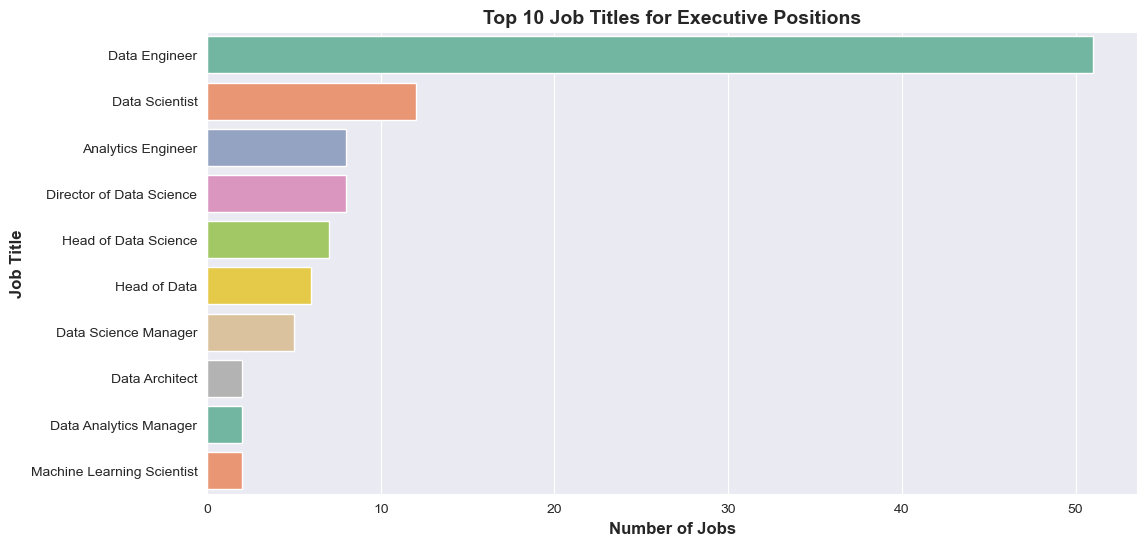

In [678]:
entry_level_jobs = data[data['experience_level'] == 'Executive']

job_title_counts = entry_level_jobs['job_title'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=job_title_counts.values, y=job_title_counts.index, palette='Set2')

plt.title('Top 10 Job Titles for Executive Positions', fontsize=14, fontweight='bold')
plt.xlabel('Number of Jobs', fontsize=12, fontweight='bold')
plt.ylabel('Job Title', fontsize=12, fontweight='bold')

plt.show()

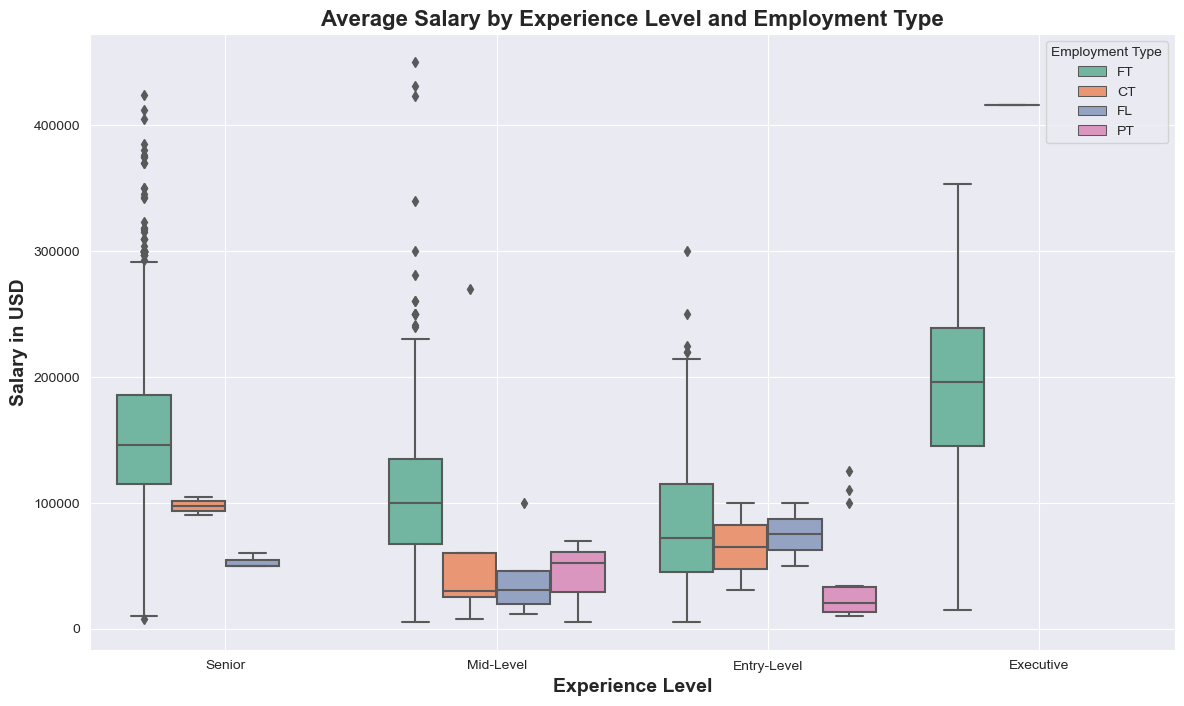

In [679]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='experience_level', y='salary_in_usd', hue='employment_type', data=data, palette='Set2')

plt.title('Average Salary by Experience Level and Employment Type', fontsize=16, fontweight='bold')
plt.xlabel('Experience Level', fontsize=14, fontweight='bold')
plt.ylabel('Salary in USD', fontsize=14, fontweight='bold')

plt.legend(title='Employment Type')
plt.grid(True)
plt.show()

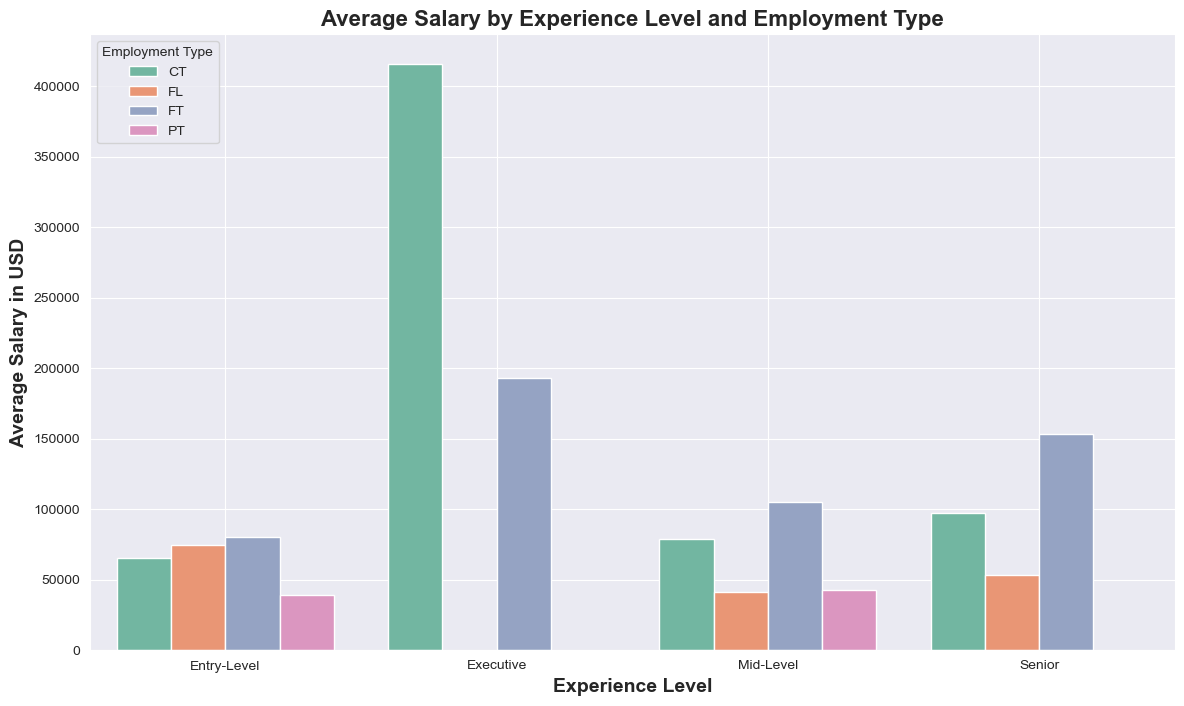

In [680]:
avg_salary = data.groupby(['experience_level', 'employment_type'])['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='experience_level', y='salary_in_usd', hue='employment_type', data=avg_salary, palette='Set2')

plt.title('Average Salary by Experience Level and Employment Type', fontsize=16, fontweight='bold')
plt.xlabel('Experience Level', fontsize=14, fontweight='bold')
plt.ylabel('Average Salary in USD', fontsize=14, fontweight='bold')

plt.legend(title='Employment Type')
plt.grid(True)
plt.show()

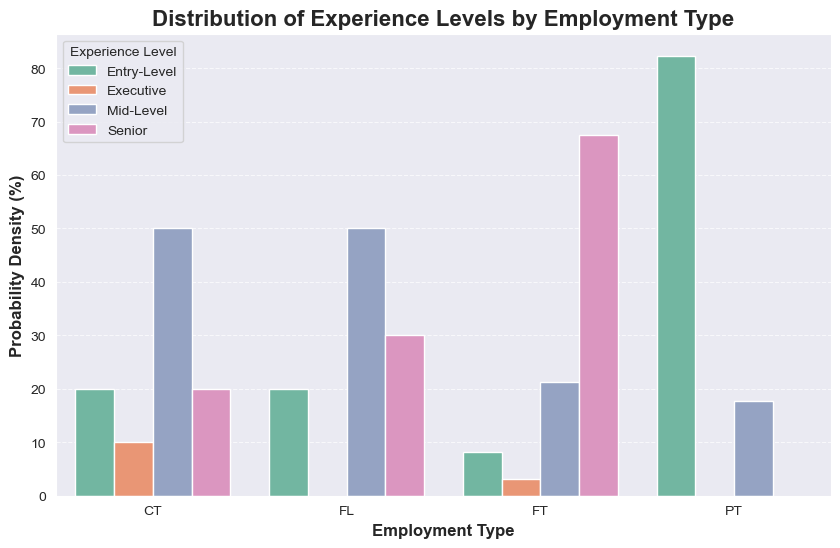

In [681]:
percentage_data = data.groupby(['employment_type', 'experience_level']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')

plt.figure(figsize=(10, 6))
sns.barplot(x='employment_type', y='percentage', hue='experience_level', data=percentage_data, palette='Set2')

plt.title('Distribution of Experience Levels by Employment Type', fontsize=16, fontweight='bold')
plt.xlabel('Employment Type', fontsize=12, fontweight='bold')
plt.ylabel('Probability Density (%)', fontsize=12, fontweight='bold')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.legend(title='Experience Level')
plt.show()

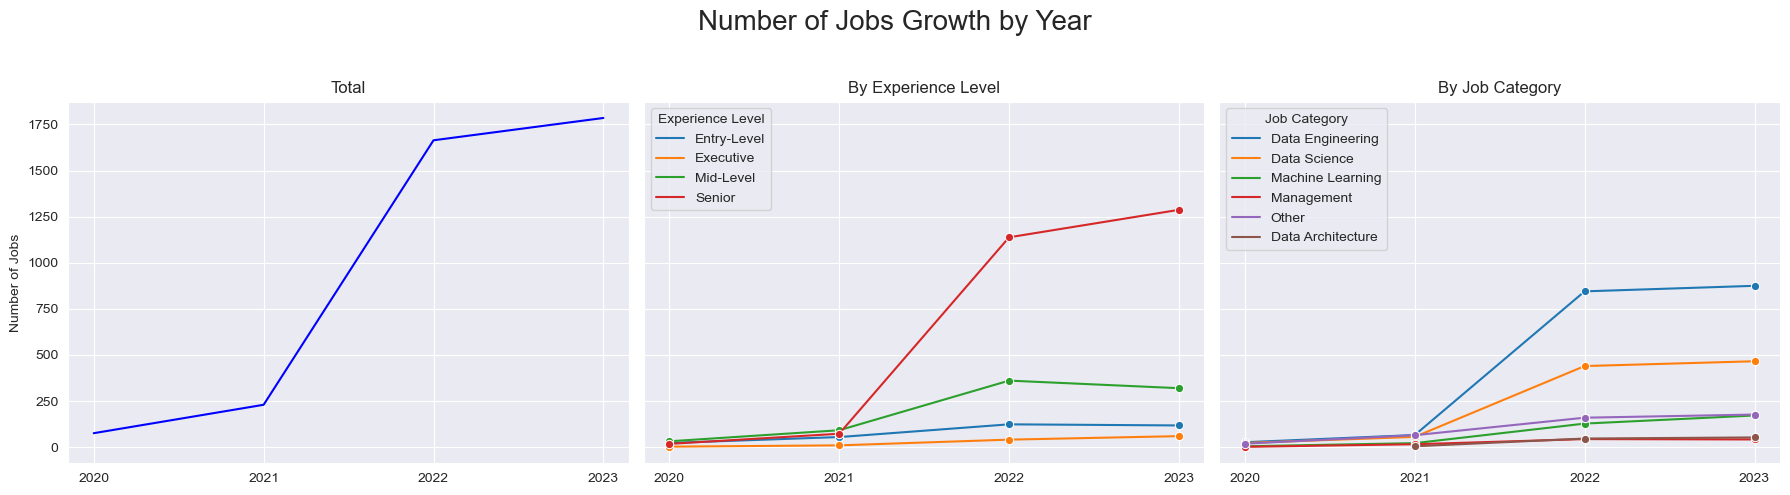

In [682]:
import matplotlib.ticker as mtick

# Calculate job counts by year and experience level
counts_exp = data.groupby(by=['work_year', 'experience_level']).size().reset_index(name='counts')
# Calculate job counts by year and job category
counts_field = data.groupby(by=['work_year', 'job_category']).size().reset_index(name='counts')

# Set up the plot style and figure
sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle('Number of Jobs Growth by Year', fontsize=20)

# Plot the total number of jobs per year
sns.lineplot(
    ax=axes[0],
    data=counts_exp.groupby('work_year').sum().reset_index(),
    x='work_year',
    y='counts',
    color='b'
)
axes[0].set_xticks(counts_exp['work_year'].unique())
axes[0].set_xlabel('')
axes[0].set_ylabel('Number of Jobs')
axes[0].set_title('Total')

# Plot job growth per experience level
sns.lineplot(
    ax=axes[1],
    data=counts_exp,
    x='work_year',
    y='counts',
    hue='experience_level',
    marker='o'
)
axes[1].set_xticks(counts_exp['work_year'].unique())
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_title('By Experience Level')
axes[1].legend(title='Experience Level', loc='upper left')

# Plot job growth per job category
sns.lineplot(
    ax=axes[2],
    data=counts_field,
    x='work_year',
    y='counts',
    hue='job_category',
    marker='o'
)
axes[2].set_xticks(counts_field['work_year'].unique())
axes[2].set_xlabel('')
axes[2].set_ylabel('')
axes[2].set_title('By Job Category')
axes[2].legend(title='Job Category', loc='upper left')

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Make space for suptitle
plt.show()


               work_year    salary  salary_in_usd  remote_ratio
work_year       1.000000 -0.094724       0.228290     -0.236430
salary         -0.094724  1.000000      -0.023676      0.028731
salary_in_usd   0.228290 -0.023676       1.000000     -0.064171
remote_ratio   -0.236430  0.028731      -0.064171      1.000000


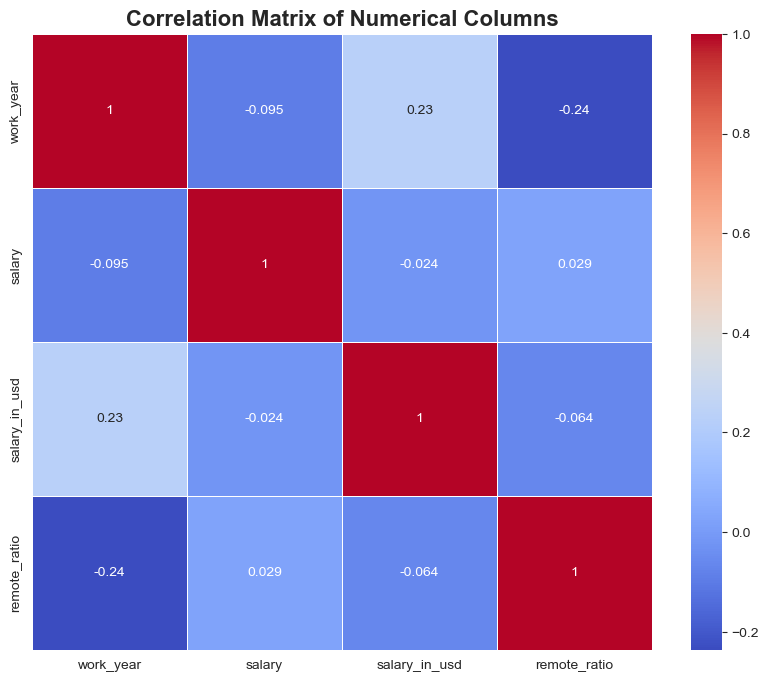

In [683]:
correlation_matrix = data.corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix of Numerical Columns', fontsize=16, fontweight='bold')

plt.show()

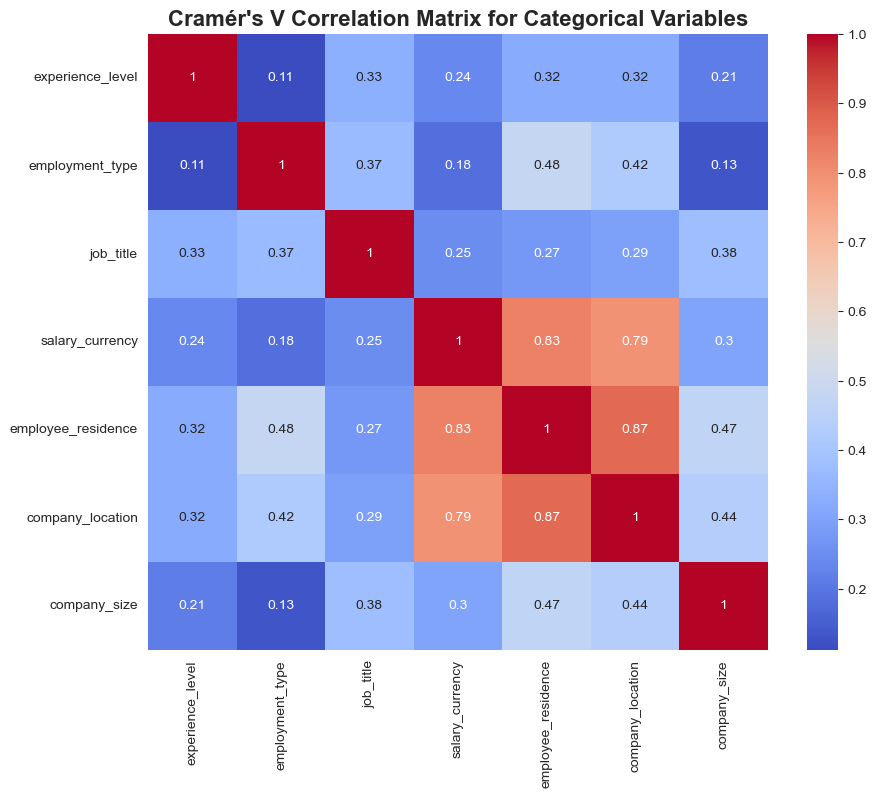

In [684]:
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0  
        else:
            confusion_matrix = pd.crosstab(data[col1], data[col2])
            cramers_v_matrix.loc[col1, col2] = cramers_v(confusion_matrix)

cramers_v_matrix = cramers_v_matrix.astype(float)

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm')

plt.title("Cramér's V Correlation Matrix for Categorical Variables", fontsize=16, fontweight='bold')
plt.show()

In [685]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

X = data[numerical_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

vif_data = pd.DataFrame()
vif_data["feature"] = numerical_columns

vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data)

         feature       VIF
0      work_year  1.121639
1         salary  1.009101
2  salary_in_usd  1.055109
3   remote_ratio  1.059377


In [686]:
import pandas as pd

# URL of the Wikipedia page containing the ISO 3166-1 alpha-2 codes
url = "https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2"

# Read all tables on the Wikipedia page
tables = pd.read_html(url)

# Display the number of tables found
print(f"Number of tables found: {len(tables)}")

# Display the first few rows of each table to identify the correct one
for i, table in enumerate(tables):
    print(f"\nTable {i}")
    print(table.head())

Number of tables found: 15

Table 0
   Short name                                          Long name  \
0  ISO 3166-2                        Country subdivision code[1]   
1    ISO 3901    International Standard Recording Code (ISRC)[2]   
2    ISO 4217                                   Currency code[3]   
3    ISO 6166  International Securities Identifying Number (I...   
4    ISO 9362                        Bank Identifier Codes (BIC)   

                        Comment  
0                           NaN  
1                           NaN  
2                           NaN  
3                           NaN  
4  Also known as SWIFT codes[5]  

Table 1
   0   1   2   3   4   5   6   7   8   9   ...  16  17  18  19  20  21  22  \
0  AA  AB  AC  AD  AE  AF  AG  AH  AI  AJ  ...  AQ  AR  AS  AT  AU  AV  AW   
1  BA  BB  BC  BD  BE  BF  BG  BH  BI  BJ  ...  BQ  BR  BS  BT  BU  BV  BW   
2  CA  CB  CC  CD  CE  CF  CG  CH  CI  CJ  ...  CQ  CR  CS  CT  CU  CV  CW   
3  DA  DB  DC  DD  DE  DF  DG 

In [687]:
# Assuming the correct table is table 0
iso_table = tables[4]

# Selecting only relevant columns: 'Code' and 'Country name (using title case)'
iso_table = iso_table[['Code', 'Country name (using title case)']]

# Renaming columns for easier use
iso_table.columns = ['Code', 'Country_Name']

# Sample list of codes you want to match
codes_to_match = ['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH', 'CF', 'FR', 'AU',
            'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'CO', 'SG', 'SE', 'SI', 'MX', 'UZ', 'BR', 'TH',
            'HR', 'PL', 'KW', 'VN', 'CY', 'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK',
            'IT', 'MA', 'LT', 'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL', 'PR',
            'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE', 'HN', 'TN', 'RU', 'DZ',
            'IQ', 'BG', 'JE', 'RS', 'NZ', 'MD', 'LU', 'MT']  # Replace with your list of codes

# Filter the table to get only the rows with the specified codes
matched_countries = iso_table[iso_table['Code'].isin(codes_to_match)]

# Display the resulting DataFrame
print(matched_countries)

    Code              Country_Name
1     AE      United Arab Emirates
6     AM                   Armenia
9     AR                 Argentina
10    AS            American Samoa
11    AT                   Austria
..   ...                       ...
224   TR                   Türkiye
229   UA                   Ukraine
232   US  United States of America
234   UZ                Uzbekistan
240   VN                  Viet Nam

[78 rows x 2 columns]


In [688]:
# Merge your dataset with the ISO table based on the ISO codes
data = pd.merge(data, matched_countries, left_on='employee_residence', right_on='Code', how='left')

# Drop the redundant 'Code' column if it's no longer needed
data = data.drop(columns=['Code'])

# Display the resulting DataFrame
print(data.head())

   work_year experience_level employment_type                 job_title  \
0       2023           Senior              FT  Principal Data Scientist   
1       2023        Mid-Level              CT               ML Engineer   
2       2023        Mid-Level              CT               ML Engineer   
3       2023           Senior              FT            Data Scientist   
4       2023           Senior              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size      job_category ratio_class  \
0               ES   

In [689]:
country_to_continent = {
    'ES': 'Europe', 'US': 'North America', 'CA': 'North America', 'DE': 'Europe', 'GB': 'Europe',
    'NG': 'Africa', 'IN': 'Asia', 'HK': 'Asia', 'NL': 'Europe', 'CH': 'Europe', 'CF': 'Africa',
    'FR': 'Europe', 'FI': 'Europe', 'UA': 'Europe', 'IE': 'Europe', 'IL': 'Asia', 'GH': 'Africa',
    'CO': 'South America', 'SG': 'Asia', 'AU': 'Oceania', 'SE': 'Europe', 'SI': 'Europe',
    'MX': 'North America', 'BR': 'South America', 'PT': 'Europe', 'RU': 'Europe', 'TH': 'Asia',
    'HR': 'Europe', 'VN': 'Asia', 'EE': 'Europe', 'AM': 'Asia', 'BA': 'Europe', 'KE': 'Africa',
    'GR': 'Europe', 'MK': 'Europe', 'LV': 'Europe', 'RO': 'Europe', 'PK': 'Asia', 'IT': 'Europe',
    'MA': 'Africa', 'PL': 'Europe', 'AL': 'Europe', 'AR': 'South America', 'LT': 'Europe',
    'AS': 'Oceania', 'CR': 'North America', 'IR': 'Asia', 'BS': 'North America', 'HU': 'Europe',
    'AT': 'Europe', 'SK': 'Europe', 'CZ': 'Europe', 'TR': 'Asia', 'PR': 'North America',
    'DK': 'Europe', 'BO': 'South America', 'PH': 'Asia', 'BE': 'Europe', 'ID': 'Asia',
    'EG': 'Africa', 'AE': 'Asia', 'LU': 'Europe', 'MY': 'Asia', 'HN': 'North America', 
    'JP': 'Asia', 'DZ': 'Africa', 'IQ': 'Asia', 'CN': 'Asia', 'NZ': 'Oceania', 'CL': 'South America',
    'MD': 'Europe', 'MT': 'Europe'
}
continent_df = pd.DataFrame(list(country_to_continent.items()), columns=['company_location', 'continent'])

# Assuming your main dataset is called `data` and it contains a column `country_code`
# Merge the continent information into your main dataset
data = data.merge(continent_df, on='company_location', how='left')

# Display the merged dataset
print(data.head())

   work_year experience_level employment_type                 job_title  \
0       2023           Senior              FT  Principal Data Scientist   
1       2023        Mid-Level              CT               ML Engineer   
2       2023        Mid-Level              CT               ML Engineer   
3       2023           Senior              FT            Data Scientist   
4       2023           Senior              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size      job_category ratio_class  \
0               ES   

In [690]:
data['salary_category'] = pd.cut(
    data['salary_in_usd'],
    bins=[0, 100000, 200000, float('inf')],
    labels=['salary<100,000 USD', '100,000≤salary<200,000 USD', 'salary≥200,000 USD']
)

data[['salary_in_usd', 'salary_category']].head()

,salary_in_usd,salary_category
0,85847,"salary<100,000 USD"
1,30000,"salary<100,000 USD"
2,25500,"salary<100,000 USD"
3,175000,"100,000≤salary<200,000 USD"
4,120000,"100,000≤salary<200,000 USD"


In [691]:
from sklearn.preprocessing import OrdinalEncoder
# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['Small', 'Medium', 'Large']])

# Fit and transform the salary_category column
data['company_size_numeric'] = ordinal_encoder.fit_transform(data[['company_size']]).astype(int) + 1

# Display the result
data[['company_size', 'company_size_numeric']].head()

,company_size,company_size_numeric
0,Large,3
1,Small,1
2,Small,1
3,Medium,2
4,Medium,2


In [692]:
# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['salary<100,000 USD', '100,000≤salary<200,000 USD', 'salary≥200,000 USD']])

# Fit and transform the salary_category column
data['salary_category_numeric'] = ordinal_encoder.fit_transform(data[['salary_category']]).astype(int) + 1

# Display the result
data[['salary_category', 'salary_category_numeric']].head()

,salary_category,salary_category_numeric
0,"salary<100,000 USD",1
1,"salary<100,000 USD",1
2,"salary<100,000 USD",1
3,"100,000≤salary<200,000 USD",2
4,"100,000≤salary<200,000 USD",2


In [693]:
# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['Small', 'Medium', 'Large']])

# Fit and transform the salary_category column
data['company_size_numeric'] = ordinal_encoder.fit_transform(data[['company_size']]).astype(int) + 1

# Display the result
data[['company_size', 'company_size_numeric']].head()

,company_size,company_size_numeric
0,Large,3
1,Small,1
2,Small,1
3,Medium,2
4,Medium,2


In [694]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category,ratio_class,Country_Name,continent,salary_category,company_size_numeric,salary_category_numeric
0,2023,Senior,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,Large,Other,Remote,Spain,Europe,"salary<100,000 USD",3,1
1,2023,Mid-Level,CT,ML Engineer,30000,USD,30000,US,100,US,Small,Machine Learning,Remote,United States of America,North America,"salary<100,000 USD",1,1
2,2023,Mid-Level,CT,ML Engineer,25500,USD,25500,US,100,US,Small,Machine Learning,Remote,United States of America,North America,"salary<100,000 USD",1,1
3,2023,Senior,FT,Data Scientist,175000,USD,175000,CA,100,CA,Medium,Data Science,Remote,Canada,North America,"100,000≤salary<200,000 USD",2,2
4,2023,Senior,FT,Data Scientist,120000,USD,120000,CA,100,CA,Medium,Data Science,Remote,Canada,North America,"100,000≤salary<200,000 USD",2,2


In [695]:
# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['Entry-Level', 'Mid-Level', 'Senior','Executive']])

# Fit and transform the salary_category column
data['experience_level_numeric'] = ordinal_encoder.fit_transform(data[['experience_level']]).astype(int) + 1

# Display the result
data[['experience_level', 'experience_level_numeric']].head()

,experience_level,experience_level_numeric
0,Senior,3
1,Mid-Level,2
2,Mid-Level,2
3,Senior,3
4,Senior,3


In [696]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category,ratio_class,Country_Name,continent,salary_category,company_size_numeric,salary_category_numeric,experience_level_numeric
0,2023,Senior,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,Large,Other,Remote,Spain,Europe,"salary<100,000 USD",3,1,3
1,2023,Mid-Level,CT,ML Engineer,30000,USD,30000,US,100,US,Small,Machine Learning,Remote,United States of America,North America,"salary<100,000 USD",1,1,2
2,2023,Mid-Level,CT,ML Engineer,25500,USD,25500,US,100,US,Small,Machine Learning,Remote,United States of America,North America,"salary<100,000 USD",1,1,2
3,2023,Senior,FT,Data Scientist,175000,USD,175000,CA,100,CA,Medium,Data Science,Remote,Canada,North America,"100,000≤salary<200,000 USD",2,2,3
4,2023,Senior,FT,Data Scientist,120000,USD,120000,CA,100,CA,Medium,Data Science,Remote,Canada,North America,"100,000≤salary<200,000 USD",2,2,3


In [697]:
# List of columns you want to drop
columns_to_drop1 = ['experience_level','job_title','salary_currency','salary_in_usd', 'employee_residence', 'company_location',
                   'remote_ratio','company_size']  # Replace with your column names

# Drop the specified columns
data.drop(columns=columns_to_drop1, inplace=True)

# Display the updated DataFrame
print(data.head())

   work_year employment_type  salary      job_category ratio_class  \
0       2023              FT   80000             Other      Remote   
1       2023              CT   30000  Machine Learning      Remote   
2       2023              CT   25500  Machine Learning      Remote   
3       2023              FT  175000      Data Science      Remote   
4       2023              FT  120000      Data Science      Remote   

               Country_Name      continent             salary_category  \
0                     Spain         Europe          salary<100,000 USD   
1  United States of America  North America          salary<100,000 USD   
2  United States of America  North America          salary<100,000 USD   
3                    Canada  North America  100,000≤salary<200,000 USD   
4                    Canada  North America  100,000≤salary<200,000 USD   

   company_size_numeric  salary_category_numeric  experience_level_numeric  
0                     3                        1         

In [698]:
# Drop the specified columns
data.drop(columns='salary_category', inplace=True)

# Display the updated DataFrame
print(data.head())

   work_year employment_type  salary      job_category ratio_class  \
0       2023              FT   80000             Other      Remote   
1       2023              CT   30000  Machine Learning      Remote   
2       2023              CT   25500  Machine Learning      Remote   
3       2023              FT  175000      Data Science      Remote   
4       2023              FT  120000      Data Science      Remote   

               Country_Name      continent  company_size_numeric  \
0                     Spain         Europe                     3   
1  United States of America  North America                     1   
2  United States of America  North America                     1   
3                    Canada  North America                     2   
4                    Canada  North America                     2   

   salary_category_numeric  experience_level_numeric  
0                        1                         3  
1                        1                         2  
2    

In [699]:
# Drop the specified columns
data.drop(columns='Country_Name', inplace=True)

# Display the updated DataFrame
print(data.head())

   work_year employment_type  salary      job_category ratio_class  \
0       2023              FT   80000             Other      Remote   
1       2023              CT   30000  Machine Learning      Remote   
2       2023              CT   25500  Machine Learning      Remote   
3       2023              FT  175000      Data Science      Remote   
4       2023              FT  120000      Data Science      Remote   

       continent  company_size_numeric  salary_category_numeric  \
0         Europe                     3                        1   
1  North America                     1                        1   
2  North America                     1                        1   
3  North America                     2                        2   
4  North America                     2                        2   

   experience_level_numeric  
0                         3  
1                         2  
2                         2  
3                         3  
4                         

In [701]:
data = pd.get_dummies(data, columns=['employment_type','job_category','ratio_class','continent'])
print(data)

      work_year   salary  company_size_numeric  salary_category_numeric  \
0          2023    80000                     3                        1   
1          2023    30000                     1                        1   
2          2023    25500                     1                        1   
3          2023   175000                     2                        2   
4          2023   120000                     2                        2   
...         ...      ...                   ...                      ...   
3750       2020   412000                     3                        3   
3751       2021   151000                     3                        2   
3752       2020   105000                     1                        2   
3753       2020   100000                     3                        1   
3754       2021  7000000                     3                        1   

      experience_level_numeric  employment_type_CT  employment_type_FL  \
0                        

In [702]:
X = data.drop('salary_category_numeric',axis=1)
y = data['salary_category_numeric']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [703]:
from sklearn.metrics import classification_report, confusion_matrix 
from collections import Counter
print("Original class distribution:", Counter(y)) 

Original class distribution: Counter({2: 2134, 1: 1090, 3: 531})


In [704]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and resample the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Print the class distribution of the resampled data
print("SMOTE class distribution:", Counter(y_resampled))

# Optional: You can also print the shape of the resampled dataset
print("Resampled X shape:", X_resampled.shape)
print("Resampled y shape:", y_resampled.shape)

SMOTE class distribution: Counter({1: 1719, 2: 1719, 3: 1719})
Resampled X shape: (5157, 23)
Resampled y shape: (5157,)


In [705]:
from sklearn.model_selection import cross_val_predict, cross_val_score,KFold, RepeatedStratifiedKFold
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

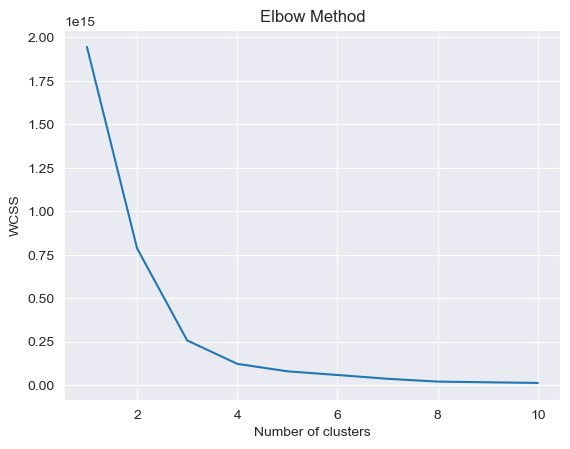

In [706]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_resampled)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The average silhouette score is: 0.9812329407485676


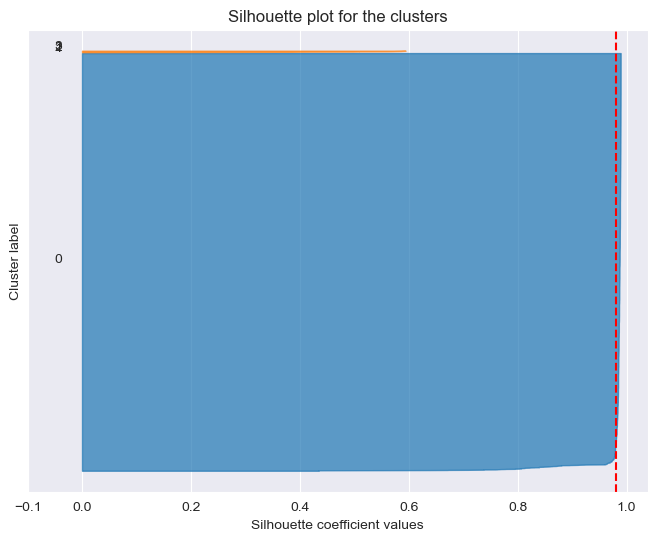

In [707]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_resampled)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
silhouette_avg = silhouette_score(X_resampled, cluster_labels)
print("The average silhouette score is:", silhouette_avg)


sample_silhouette_values = silhouette_samples(X_resampled, cluster_labels)


fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)


cluster_colors = sns.color_palette('tab10', n_colors=4)

y_lower = 10
for i in range(4):  
    
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cluster_colors[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    
    y_lower = y_upper + 10  

ax1.set_title("Silhouette plot for the clusters")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")


ax1.axvline(x=silhouette_avg, color="red", linestyle="--")


ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

C:\Users\HP\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:252: UserWarning: n_clusters should be larger than 2 if max_iter != 0 setting max_iter to 0.
  warnings.warn(


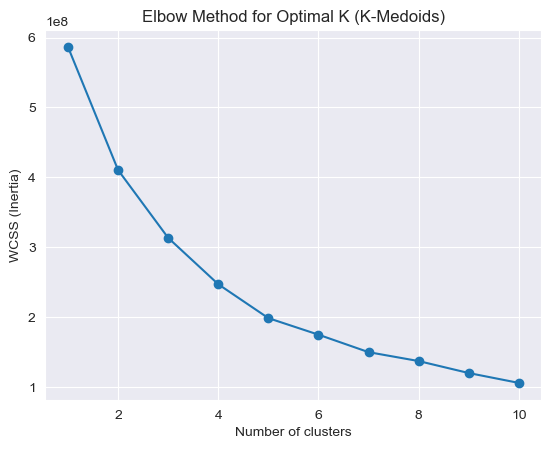

In [708]:
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt

# Initialize an empty list to store WCSS (inertia)
wcss = []

# Loop through a range of cluster numbers
for i in range(1, 11):
    kmedoids = KMedoids(n_clusters=i, random_state=42, method='pam')  # Use 'pam' method
    kmedoids.fit(X_resampled)
    wcss.append(kmedoids.inertia_)  # Inertia represents WCSS for KMedoids as well

# Plot the Elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K (K-Medoids)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Inertia)')
plt.show()

In [709]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import mord as m
import warnings
warnings.simplefilter(action='ignore')

# Define models with parameter grids for hyperparameter tuning
model_params = {
    'Ordinal Logistic Regression': {
        'model': m.LogisticAT(),  # Using Mord's LogisticAT for ordinal regression
        'params': {
            'alpha': [0.1, 0.5, 1.0]  # Regularization parameter
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 15]
        }
    },
    'GaussianNB': {
        'model': GaussianNB(),
        'params': {}
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.5],
            'max_depth': [3, 5, 7]
        }
    }
   
}

# Loop through each model and perform hyperparameter tuning with GridSearchCV
for name, model_dict in model_params.items():
    print(f"Training {name} with hyperparameter tuning...")
    grid_search = GridSearchCV(model_dict['model'], model_dict['params'], cv=5, scoring='accuracy')
    
    # Fit with the resampled SMOTE data
    grid_search.fit(X_resampled, y_resampled)
    
    best_model = grid_search.best_estimator_
    
    # Training predictions and metrics
    train_pred = best_model.predict(X_resampled)
    train_acc = accuracy_score(y_resampled, train_pred)
    train_err = 1 - train_acc
    train_f1 = f1_score(y_resampled, train_pred, average='weighted')
    train_cm = confusion_matrix(y_resampled, train_pred)
    train_sensitivity = train_cm[1, 1] / (train_cm[1, 1] + train_cm[1, 0]) if (train_cm[1, 1] + train_cm[1, 0]) != 0 else 0
    train_specificity = train_cm[0, 0] / (train_cm[0, 0] + train_cm[0, 1]) if (train_cm[0, 0] + train_cm[0, 1]) != 0 else 0
    
    # Test predictions and metrics
    test_pred = best_model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_err = 1 - test_acc
    test_f1 = f1_score(y_test, test_pred, average='weighted')
    test_cm = confusion_matrix(y_test, test_pred)
    test_sensitivity = test_cm[1, 1] / (test_cm[1, 1] + test_cm[1, 0]) if (test_cm[1, 1] + test_cm[1, 0]) != 0 else 0
    test_specificity = test_cm[0, 0] / (test_cm[0, 0] + test_cm[0, 1]) if (test_cm[0, 0] + test_cm[0, 1]) != 0 else 0
    
    # Print results
    print(name)
    print('=' * len(name))
    print(f'Best Parameters: {grid_search.best_params_}')
    print(f'Training Accuracy: {train_acc:.4f}')
    print(f'Training Error Rate: {train_err:.4f}')
    print(f'Training F1 Score: {train_f1:.4f}')
    print(f'Training Confusion Matrix:\n{train_cm}')
    print(f'Training Sensitivity: {train_sensitivity:.4f}')
    print(f'Training Specificity: {train_specificity:.4f}')
    print('\n')
    print(f'Test Accuracy: {test_acc:.4f}')
    print(f'Test Error Rate: {test_err:.4f}')
    print(f'Test F1 Score: {test_f1:.4f}')
    print(f'Test Confusion Matrix:\n{test_cm}')
    print(f'Test Sensitivity: {test_sensitivity:.4f}')
    print(f'Test Specificity: {test_specificity:.4f}')
    print('\n' + '=' * 30 + '\n')


Training Ordinal Logistic Regression with hyperparameter tuning...
Ordinal Logistic Regression
Best Parameters: {'alpha': 1.0}
Training Accuracy: 0.5610
Training Error Rate: 0.4390
Training F1 Score: 0.5354
Training Confusion Matrix:
[[1218  279  222]
 [ 297  359 1063]
 [ 133  270 1316]]
Training Sensitivity: 0.5473
Training Specificity: 0.8136


Test Accuracy: 0.4394
Test Error Rate: 0.5606
Test F1 Score: 0.4266
Test Confusion Matrix:
[[147  33  46]
 [ 89  90 236]
 [  4  13  93]]
Test Sensitivity: 0.5028
Test Specificity: 0.8167


Training Random Forest with hyperparameter tuning...
Random Forest
Best Parameters: {'max_depth': 15, 'n_estimators': 50}
Training Accuracy: 0.9996
Training Error Rate: 0.0004
Training F1 Score: 0.9996
Training Confusion Matrix:
[[1719    0    0]
 [   2 1717    0]
 [   0    0 1719]]
Training Sensitivity: 0.9988
Training Specificity: 1.0000


Test Accuracy: 0.9827
Test Error Rate: 0.0173
Test F1 Score: 0.9827
Test Confusion Matrix:
[[222   2   2]
 [  6 408   

In [710]:
# Remap target labels
y_resampled_mapped = y_resampled - 1
y_test_mapped = y_test - 1

# Define XGBoost model with parameter grid for hyperparameter tuning
xgb_model_params = {
    'model': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'params': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7]
    }
}

# Perform hyperparameter tuning with GridSearchCV
print("Training XGBoost with hyperparameter tuning...")
grid_search = GridSearchCV(xgb_model_params['model'], xgb_model_params['params'], cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled_mapped)

best_model = grid_search.best_estimator_

# Training predictions and metrics
train_pred = best_model.predict(X_resampled)
train_acc = accuracy_score(y_resampled_mapped, train_pred)
train_err = 1 - train_acc
train_f1 = f1_score(y_resampled_mapped, train_pred, average='weighted')
train_cm = confusion_matrix(y_resampled_mapped, train_pred)
train_sensitivity = train_cm[1, 1] / (train_cm[1, 1] + train_cm[1, 0]) if (train_cm[1, 1] + train_cm[1, 0]) != 0 else 0
train_specificity = train_cm[0, 0] / (train_cm[0, 0] + train_cm[0, 1]) if (train_cm[0, 0] + train_cm[0, 1]) != 0 else 0

# Test predictions and metrics
test_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test_mapped, test_pred)
test_err = 1 - test_acc
test_f1 = f1_score(y_test_mapped, test_pred, average='weighted')
test_cm = confusion_matrix(y_test_mapped, test_pred)
test_sensitivity = test_cm[1, 1] / (test_cm[1, 1] + test_cm[1, 0]) if (test_cm[1, 1] + test_cm[1, 0]) != 0 else 0
test_specificity = test_cm[0, 0] / (test_cm[0, 0] + test_cm[0, 1]) if (test_cm[0, 0] + test_cm[0, 1]) != 0 else 0

# Print results
print("XGBoost")
print("=" * len("XGBoost"))
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Training Accuracy: {train_acc:.4f}')
print(f'Training Error Rate: {train_err:.4f}')
print(f'Training F1 Score: {train_f1:.4f}')
print(f'Training Confusion Matrix:\n{train_cm}')
print(f'Training Sensitivity: {train_sensitivity:.4f}')
print(f'Training Specificity: {train_specificity:.4f}')
print('\n')
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test Error Rate: {test_err:.4f}')
print(f'Test F1 Score: {test_f1:.4f}')
print(f'Test Confusion Matrix:\n{test_cm}')
print(f'Test Sensitivity: {test_sensitivity:.4f}')
print(f'Test Specificity: {test_specificity:.4f}')
print('\n' + '=' * 30 + '\n')

Training XGBoost with hyperparameter tuning...
XGBoost
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Training Accuracy: 0.9959
Training Error Rate: 0.0041
Training F1 Score: 0.9959
Training Confusion Matrix:
[[1712    7    0]
 [  11 1707    1]
 [   0    2 1717]]
Training Sensitivity: 0.9936
Training Specificity: 0.9959


Test Accuracy: 0.9907
Test Error Rate: 0.0093
Test F1 Score: 0.9907
Test Confusion Matrix:
[[223   2   1]
 [  2 412   1]
 [  1   0 109]]
Test Sensitivity: 0.9952
Test Specificity: 0.9911


